## Exploratory Data Analysis (EDA) of InterRidge (v3.4 2022)

In [1]:
import os

import numpy as np
import pandas as pd

from scipy.interpolate import griddata

import plotly.express as px
import plotly.graph_objects as go

# For working with Jupyter lab
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
DATA_DIR = "../data/"
RANDOM_STATE = 666

#### Data preprocessing

In [3]:
data_df = pd.read_csv(
    os.path.join(DATA_DIR, "InterRidge_ver_3.4_2022.csv"),
    sep=","
)

data_df

,Name ID,Name Alias(es),MGDS_FeatureID lowest in hierarchy,Vent Sites,Activity,Maximum Temperature,Max Temperature Category,Latitude,Longitude,Ocean,...,Full Spreading Rate (mm/a),Host Rock,Deposit Type,Notes on Vent Field Description,Notes Relevant to Biology,"Year and How Discovered (if active, visual confirmation is listed first)",Discovery References (text),Other References (text),Volcano Number,Node ID
0,13 N Ridge Site,NaN,Mariana,NaN,"active, confirmed",33.0,Low,13.0987,143.6886,N. Pacific,...,50.5,NotProvided,NotProvided,"J. Ishibashi (pers. comm.): ""we have dove near...",NaN,"2000 deep-tow camera (later, same year - ROV K...",Mitsuzawa et al. (2000) Preliminary report of ...,"Masuda, H. et al. (2001) Bathymetry and hydrot...",NaN,600
1,94SO2,NaN,NaN,NaN,"active, inferred",NaN,NaN,-19.4000,169.9000,S. Pacific,...,50.0,NotProvided,NotProvided,"knoll located in Futuna Trough, Coriolis (Sout...","Iizasa et al. (1998): ""There were no hydrother...",1994 towed camera with temperature did not con...,[JICA (Japan International Cooperation Agency)...,"McConacchy et al., Geology, 33, 61-64, 2005, N...",NaN,599
2,"AAR KR1, Mujin",Misty Harbor,SEIR,NaN,"active, inferred",NaN,NaN,-62.1000,158.8000,Southern,...,65.1,NotProvided,NotProvided,Korea SEIR (Australian-Antarctic Ridge) 160 E ...,"Won et al. (2014): ""the first discovery of a n...",2011 plume and biological samples,"Park, S.H. (2011) Korea national report in Int...",NaN,NaN,633
3,AAR KR2,NaN,SEIR,NaN,"active, inferred",NaN,NaN,-60.0000,152.5000,Southern,...,66.1,NotProvided,NotProvided,Korea SEIR (Australian-Antarctic Ridge) 160 E ...,NaN,2011 plume only,"Park, S.H. (2011) Korea national report in Int...",NaN,NaN,634
4,ABE,"Abe, plume 20, C-ELSC",ABE,NaN,"active, confirmed",309.0,NaN,-20.7619,-176.1910,S. Pacific,...,73.1,NotProvided,NotProvided,"U.S. Ridge 2000 ISS Bulls Eye at Lau Basin; ""v...","snails, mussels",2004 AUV ABE; 2004 plume only on previous cruise,"Wiens, D., et al. (2005) Status report on the ...","Ferrini, V. et al. (2008) Variable morphologic...",NaN,638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yokosuka,NaN,NaN,"Shisa, Neuschwanstein, Hohenschwangau, Heidelberg","active, confirmed",364.0,High,25.2638,124.3733,N. Pacific,...,43.5,NotProvided,NotProvided,position and temperature given for Hohenschwan...,see section 3.3 for microbial and 3.4 for mega...,2016 ROV Kaiko; 2014 plume only,Miyazaki J et al. (2017) Deepest and hottest h...,NaN,NaN,1321
717,Yoron Hole,"Yoron Knoll, NE-Izena",NaN,"Achijah, Heajah, Deeji","active, confirmed",247.0,NaN,27.4916,127.5333,N. Pacific,...,30.1,NotProvided,NotProvided,Cruise NT10-16 report: ROV Hyperdolphin dive 1...,"Fukuba et al. (2015): ""density and diversity w...",2010 ROV Hyperdolphin,"Fukuba, T., et al. (2015) The Yoron Hole: The ...",NaN,NaN,1210
718,Zealandia,Sarigan-Zealandia Bank Multi-Volcano Complex,Mariana,"Zealandia Bank, North Zealandia","active, inferred",NaN,NaN,16.8800,145.8500,N. Pacific,...,NaN,NotProvided,NotProvided,NaN,NotProvided,2003 plume only; 2009 or earlier ROV did not c...,"(plume only) Embley, R et al (2004) Exploratio...","Embley, RW et al. (2007) Exploring the submari...",284191.0,927
719,Zenith-Victory,NaN,MAR,NaN,inactive,NaN,NotApplicable,20.1292,-45.6225,N. Atlantic,...,24.7,MORB,NotProvided,east side of rift valley; estimated ore reserv...,NaN,2008 (need citation to confirm that the field ...,"31st cruise Professor Logatchev, in Russia nat...",NaN,NaN,928


In [4]:
data_df.columns.tolist()

['Name ID',
 'Name Alias(es)',
 'MGDS_FeatureID lowest in hierarchy',
 'Vent Sites',
 'Activity',
 'Maximum Temperature',
 'Max Temperature Category',
 'Latitude',
 'Longitude',
 'Ocean',
 'Region',
 'National Jurisdiction',
 'Maximum or Single Reported Depth',
 'Minimum Depth',
 'Tectonic setting',
 'Full Spreading Rate (mm/a)',
 'Host Rock',
 'Deposit Type',
 'Notes on Vent Field Description',
 'Notes Relevant to Biology',
 'Year and How Discovered (if active, visual confirmation is listed first)',
 'Discovery References (text)',
 'Other References (text)',
 'Volcano Number',
 'Node ID']

#### Descriptive statistics and basic visualizations

In [5]:
numerical_vars = data_df.select_dtypes(include=np.number).columns.tolist()

# Remove ID columns from the list
numerical_vars = [
    item for item in numerical_vars
    if item not in ("Volcano Number", "Node ID")
]

var_df = data_df[numerical_vars].copy()

var_df.describe()

,Maximum Temperature,Latitude,Longitude,Maximum or Single Reported Depth,Minimum Depth,Full Spreading Rate (mm/a)
count,189.000000,721.000000,721.000000,719.000000,246.000000,547.000000
mean,232.820106,0.429539,-14.983453,2112.974965,1486.247967,60.657770
std,126.220928,31.572800,117.513620,1133.270031,1146.785395,40.763821
min,5.000000,-64.500000,-179.956000,1.000000,0.000000,4.000000
25%,96.000000,-21.920000,-113.060000,1370.000000,400.000000,26.200000
50%,278.000000,-3.371200,-30.325000,2320.000000,1455.000000,55.400000
75%,339.000000,23.368300,94.967300,2800.000000,2370.000000,79.200000
max,407.000000,86.983300,179.825000,5800.000000,5200.000000,194.200000


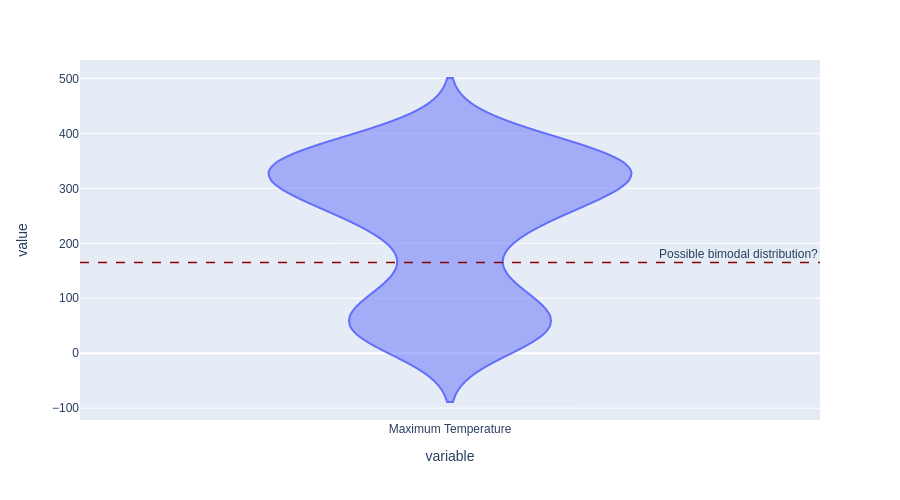

In [6]:
fig = px.violin(
    data_frame=var_df,
    y=["Maximum Temperature"],
    height=500,
    width=900
)
fig.add_hline(
    y=165.0,
    line_width=1.5,
    line_dash="dash",
    line_color="darkred",
    annotation_text="Possible bimodal distribution?"
)
fig.show("png")

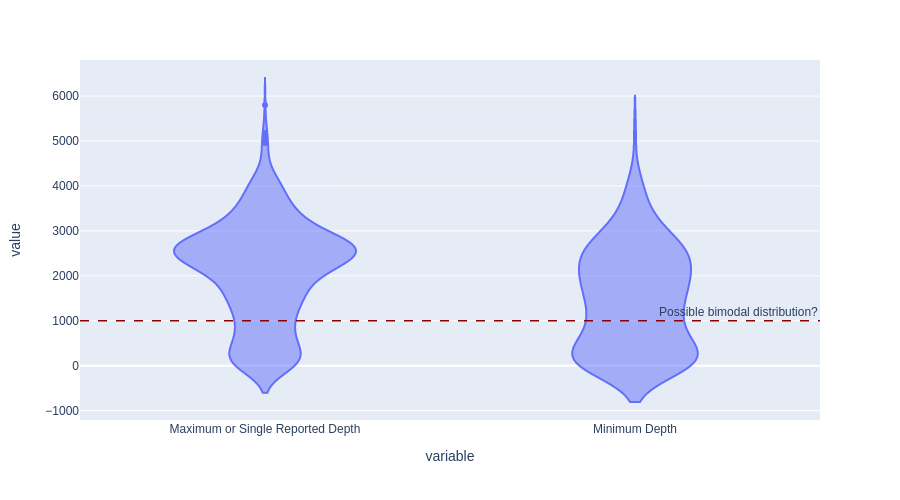

In [7]:
fig = px.violin(
    data_frame=var_df,
    y=[
        "Maximum or Single Reported Depth",
        "Minimum Depth"
    ],
    height=500,
    width=900
)
fig.add_hline(
    y=1000.0,
    line_width=1.5,
    line_dash="dash",
    line_color="darkred",
    annotation_text="Possible bimodal distribution?"
)
fig.show("png")

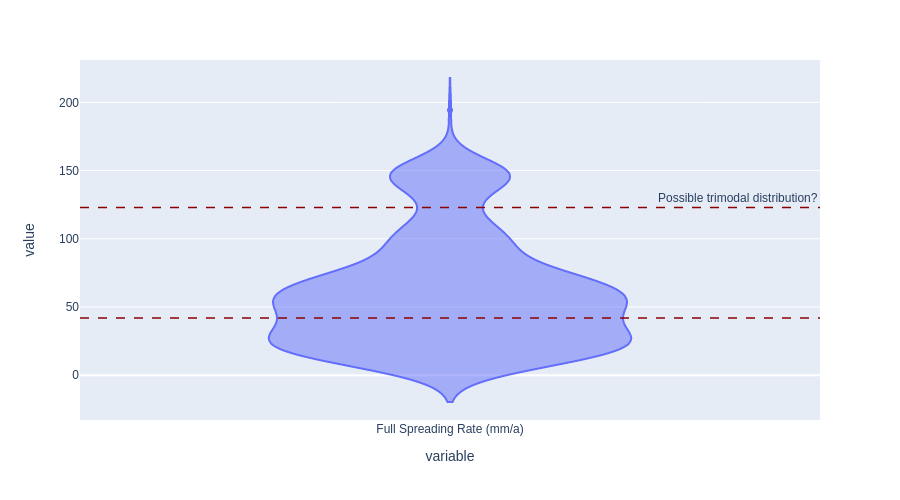

In [8]:
fig = px.violin(
    data_frame=var_df,
    y=["Full Spreading Rate (mm/a)"],
    height=500,
    width=900
)
fig.add_hline(
    y=42.0,
    line_width=1.5,
    line_dash="dash",
    line_color="darkred"
)
fig.add_hline(
    y=123.0,
    line_width=1.5,
    line_dash="dash",
    line_color="darkred",
    annotation_text="Possible trimodal distribution?"
)
fig.show("png")

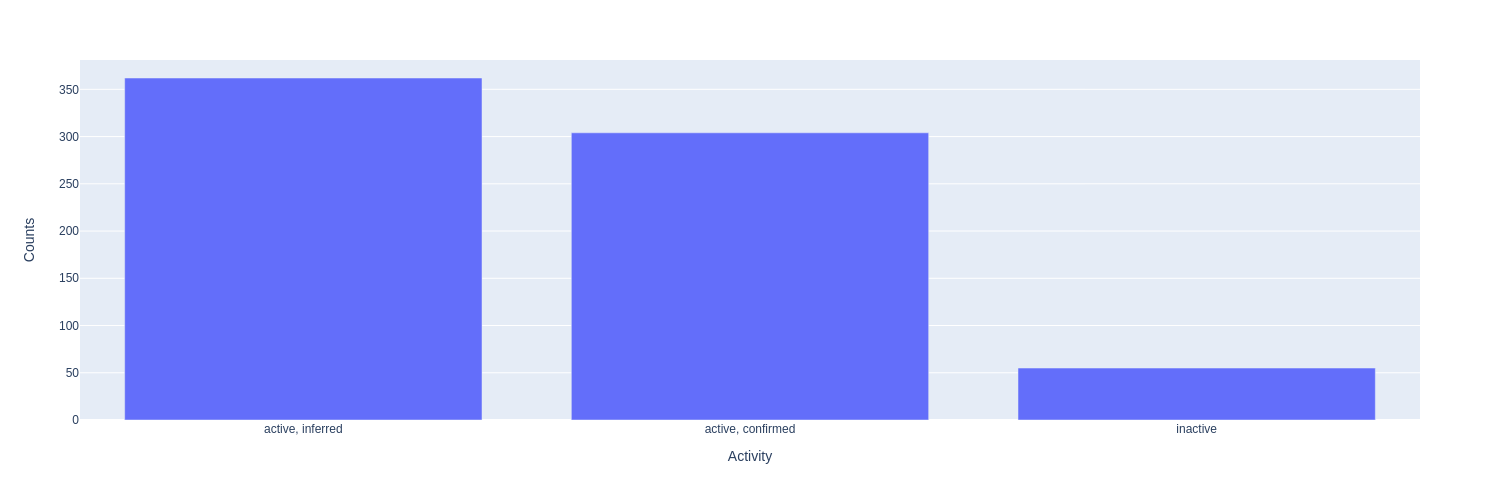

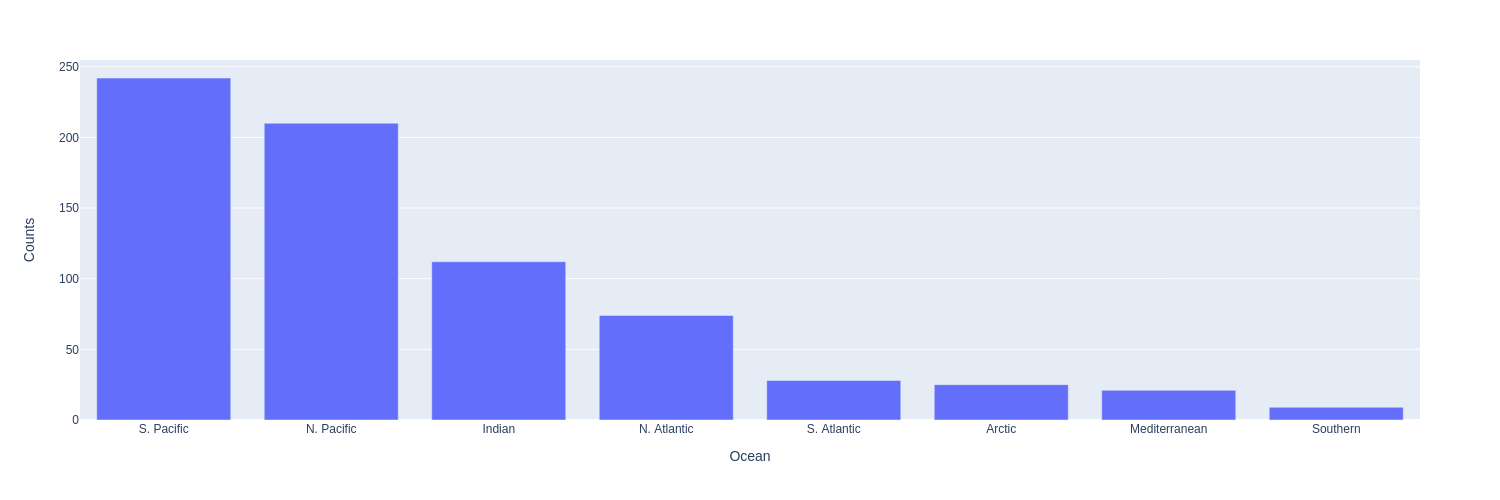

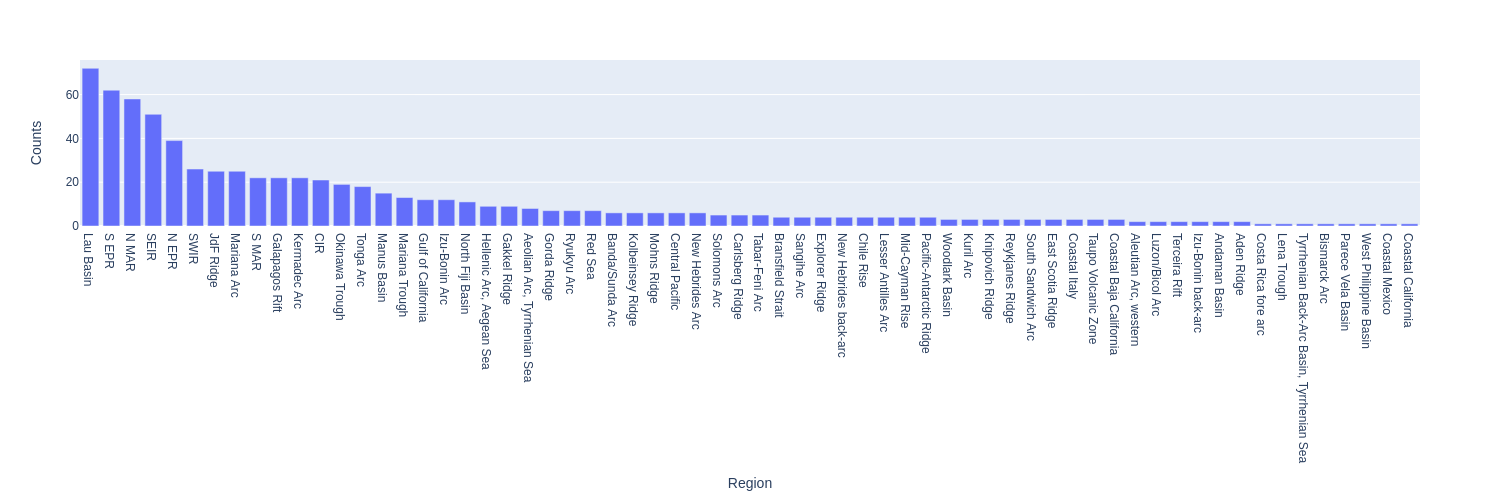

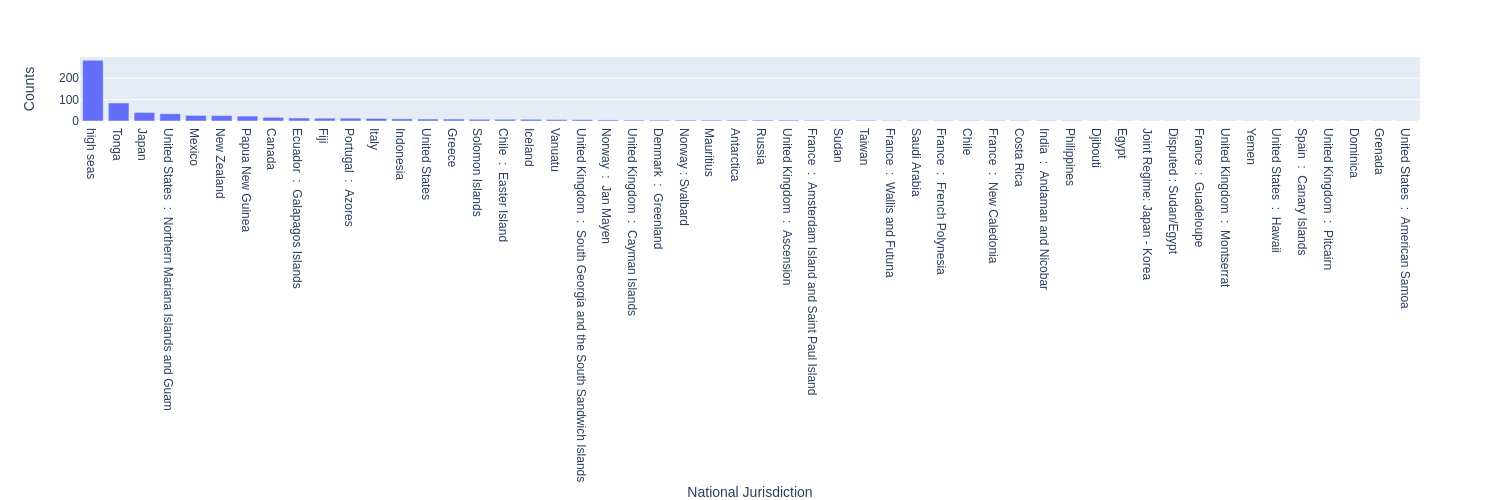

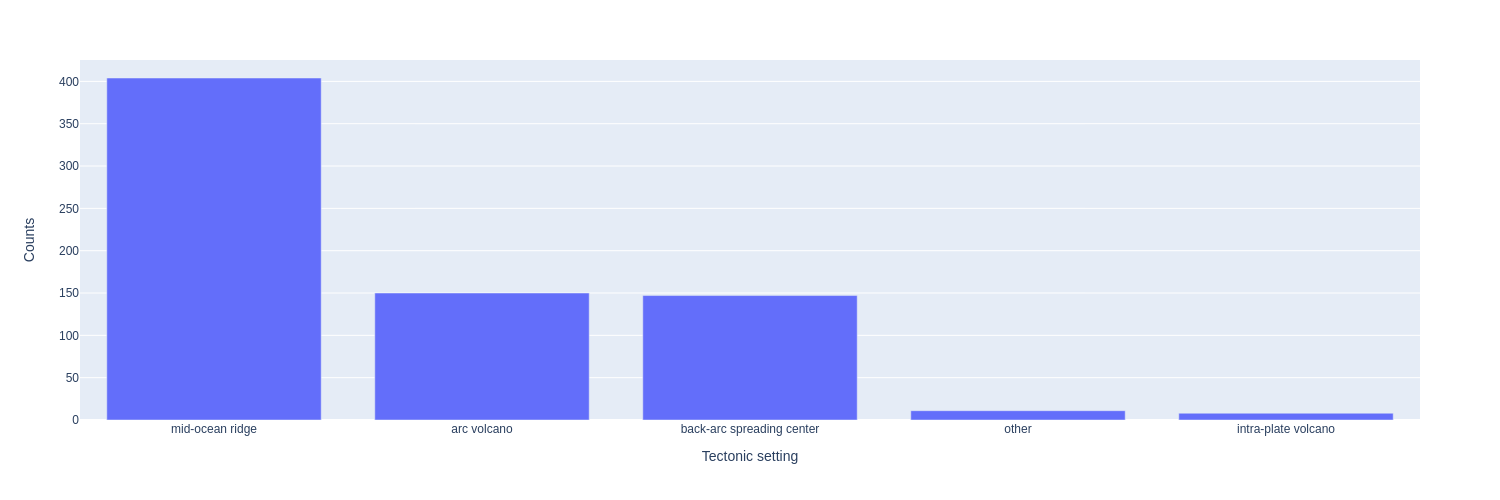

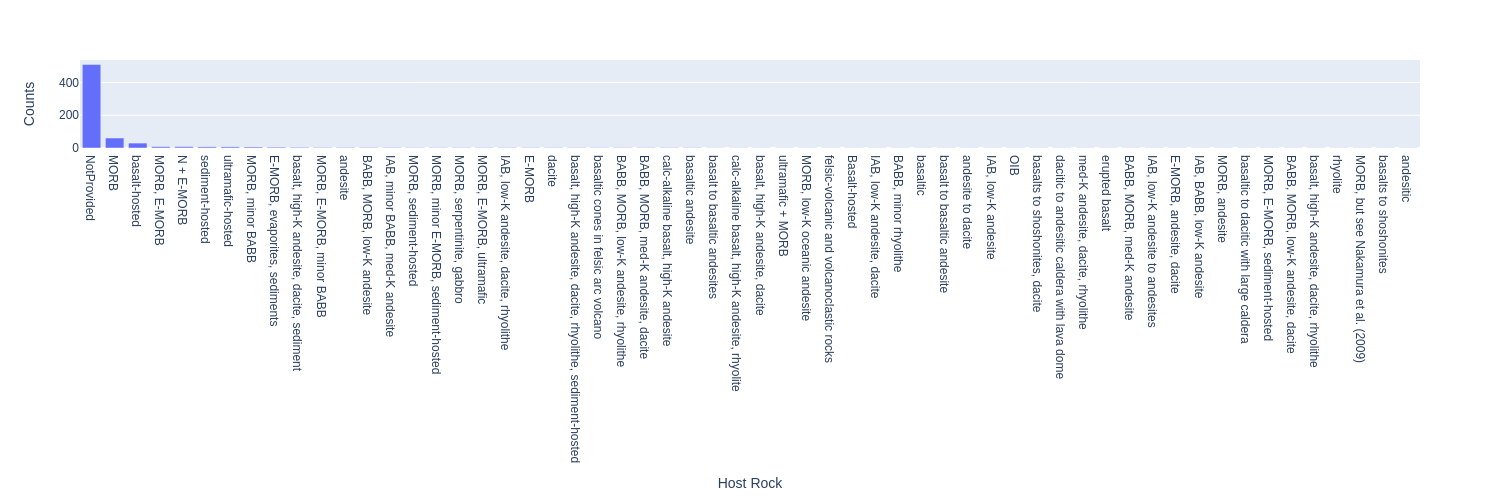

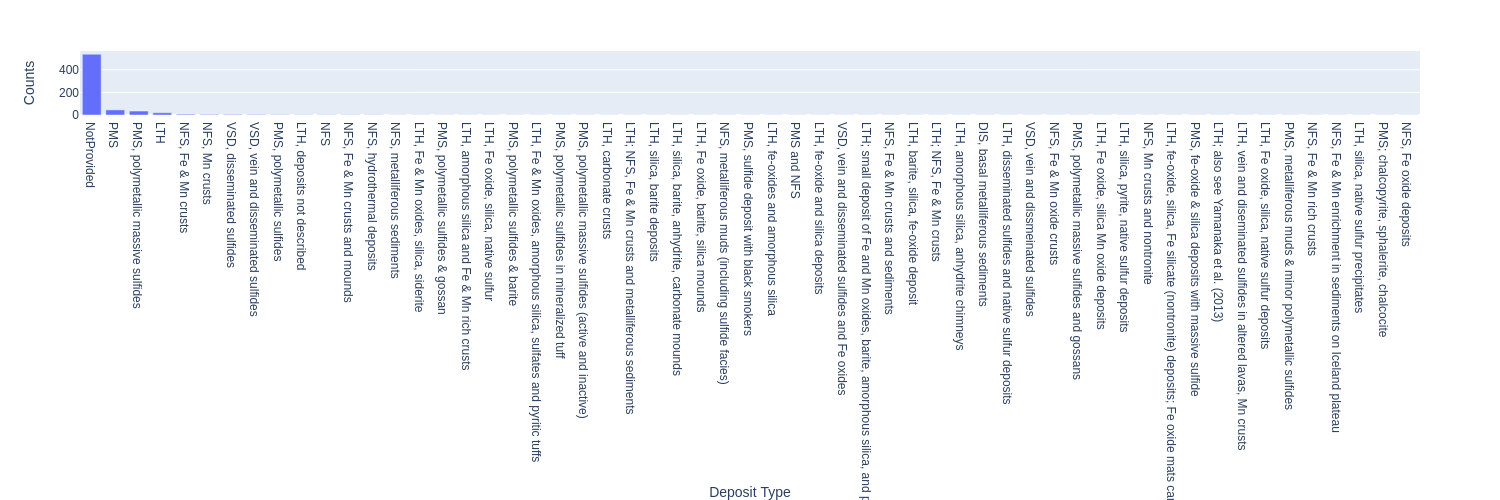

In [9]:
categorical_vars = [
    # "Vent Sites", # No vent sites with more than one count, as define by name
    "Activity",
    "Ocean",
    "Region",
    "National Jurisdiction",
    "Tectonic setting",
    "Host Rock",
    "Deposit Type"
]

for var in categorical_vars:
    var_df = data_df[var]\
        .value_counts()\
        .reset_index(drop=False)\
        .rename(columns={var: "Counts", "index": var})

    px.bar(
        data_frame=var_df,
        x=var,
        y="Counts",
        height=500,
        width=1500
    ).show("png")

Let's explore more in detail the host rock and the deposit type

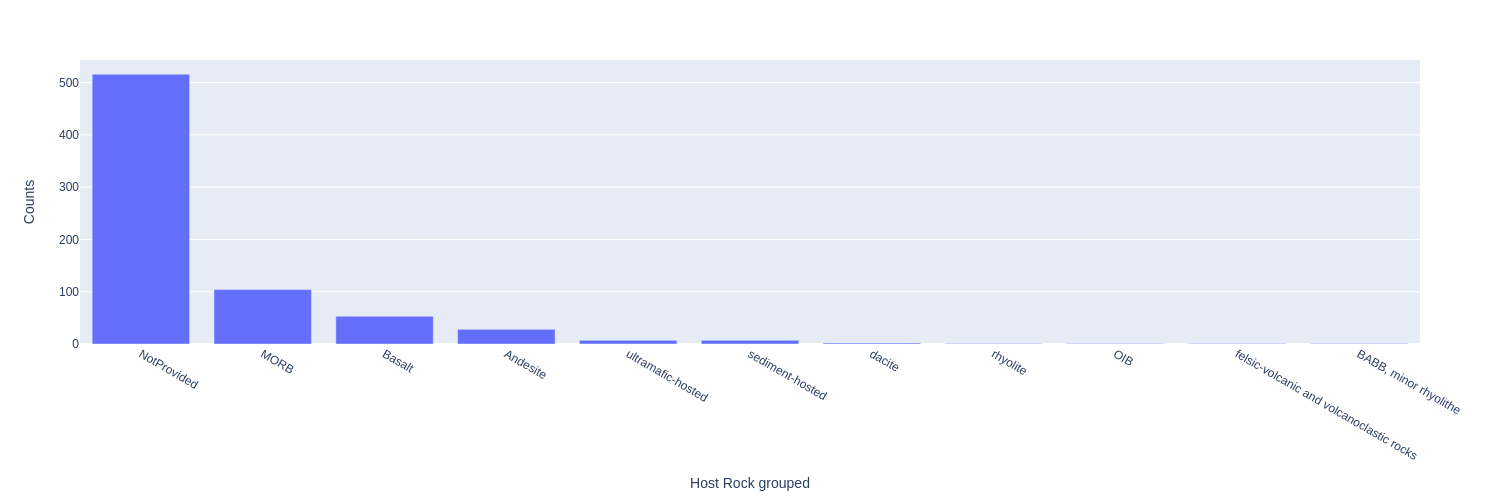

In [10]:
var = "Host Rock"

data_df[f"{var} grouped"] = data_df[var].copy()

var = f"{var} grouped"

# There are NaNs in the column
data_df[var] = data_df[var].fillna(
    value="NotProvided",
    method=None
)

# Group basalt types
data_df.loc[
    data_df[var].str.contains(
        pat="basalt",
        case=False
    ),
    var
] = "Basalt"

# Group andesite types
data_df.loc[
    data_df[var].str.contains(
        pat="andesit",
        case=False
    ),
    var
] = "Andesite"

# Group MORB types
data_df.loc[
    data_df[var].str.contains(
        pat="MORB",
        case=False
    ),
    var
] = "MORB"


# Visualize the counts
var_df = data_df[var]\
    .value_counts()\
    .reset_index(drop=False)\
    .rename(columns={var: "Counts", "index": var})

px.bar(
    data_frame=var_df,
    x=var,
    y="Counts",
    height=500,
    width=1500
).show("png")

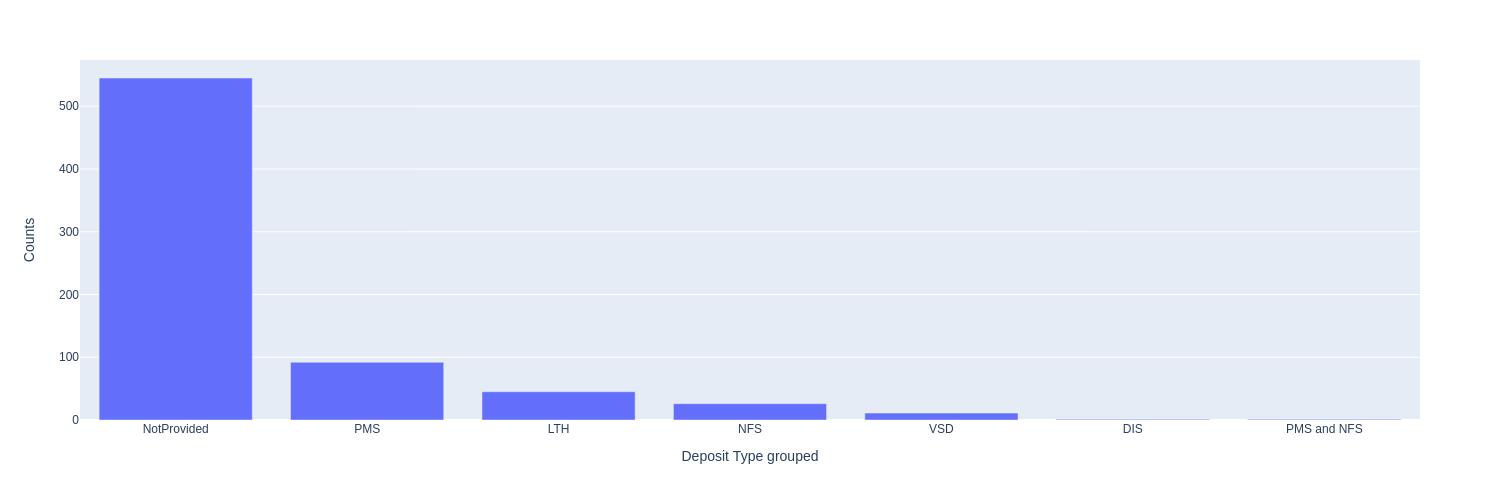

In [11]:
var = "Deposit Type"

data_df[f"{var} grouped"] = data_df[var].copy()

var = f"{var} grouped"

# There are NaNs in the column
data_df[var] = data_df[var].fillna(
    value="NotProvided",
    method=None
)

# Get acronyms
data_df[var] = data_df[var].str.split(",").str[0]
data_df[var] = data_df[var].str.split(";").str[0]

# Visualize the counts
var_df = data_df[var]\
    .value_counts()\
    .reset_index(drop=False)\
    .rename(columns={var: "Counts", "index": var})

px.bar(
    data_frame=var_df,
    x=var,
    y="Counts",
    height=500,
    width=1500
).show("png")

### Simple clustering analysis

We are going to make strong assumptions by using the grouped versions of host rock and deposit type variables

In [12]:
# Avoid using latitude and longitude to mitigate geographical and sampling bias
final_numerical_vars = [
    "Maximum Temperature",
    "Maximum or Single Reported Depth",
    "Minimum Depth",
    "Full Spreading Rate (mm/a)"
]

# Avoid using regions to mitigate geographical and sampling bias
final_categorical_vars = [
    "Activity",
    "Tectonic setting",
    "Host Rock grouped",    # WARNING: the grouped version!
    "Deposit Type grouped"  # WARNING: the grouped version!
]

# One-hot encode categorical variables to be able to use them in the analysis


In [13]:
final_data_df = data_df[
    ["Name ID"] + final_numerical_vars + final_categorical_vars
].copy()

# Avoid encoding NaNs
final_data_df[final_categorical_vars] = final_data_df[final_categorical_vars]\
    .replace(
        to_replace="NotProvided",
        value=np.nan
    )
categorical_encoded_df = pd.get_dummies(
    data=final_data_df[final_categorical_vars],
    dummy_na=False
)
categorical_encoded_df["Name ID"] = final_data_df["Name ID"].copy()

# Drop original categorical columns
final_data_df = final_data_df.drop(final_categorical_vars, axis=1)

# Add encoded columns
final_data_df = pd.merge(
    left=final_data_df,
    right=categorical_encoded_df,
    on="Name ID",
    how="inner"
)

final_data_df

,Name ID,Maximum Temperature,Maximum or Single Reported Depth,Minimum Depth,Full Spreading Rate (mm/a),"Activity_active, confirmed","Activity_active, inferred",Activity_inactive,Tectonic setting_arc volcano,Tectonic setting_back-arc spreading center,...,Host Rock grouped_felsic-volcanic and volcanoclastic rocks,Host Rock grouped_rhyolite,Host Rock grouped_sediment-hosted,Host Rock grouped_ultramafic-hosted,Deposit Type grouped_DIS,Deposit Type grouped_LTH,Deposit Type grouped_NFS,Deposit Type grouped_PMS,Deposit Type grouped_PMS and NFS,Deposit Type grouped_VSD
0,13 N Ridge Site,33.0,3036.0,2885.0,50.5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94SO2,NaN,980.0,940.0,50.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"AAR KR1, Mujin",NaN,2100.0,NaN,65.1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AAR KR2,NaN,3200.0,NaN,66.1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABE,309.0,2220.0,2140.0,73.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yokosuka,364.0,2190.0,NaN,43.5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
717,Yoron Hole,247.0,590.0,560.0,30.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
718,Zealandia,NaN,144.0,NaN,NaN,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
719,Zenith-Victory,NaN,2390.0,2370.0,24.7,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
feature_cols = [item for item in final_data_df.columns if item != "Name ID"]
feature_cols

['Maximum Temperature',
 'Maximum or Single Reported Depth',
 'Minimum Depth',
 'Full Spreading Rate (mm/a)',
 'Activity_active, confirmed',
 'Activity_active, inferred',
 'Activity_inactive',
 'Tectonic setting_arc volcano',
 'Tectonic setting_back-arc spreading center',
 'Tectonic setting_intra-plate volcano',
 'Tectonic setting_mid-ocean ridge',
 'Tectonic setting_other',
 'Host Rock grouped_Andesite',
 'Host Rock grouped_BABB, minor rhyolithe',
 'Host Rock grouped_Basalt',
 'Host Rock grouped_MORB',
 'Host Rock grouped_OIB',
 'Host Rock grouped_dacite',
 'Host Rock grouped_felsic-volcanic and volcanoclastic rocks',
 'Host Rock grouped_rhyolite',
 'Host Rock grouped_sediment-hosted',
 'Host Rock grouped_ultramafic-hosted',
 'Deposit Type grouped_DIS',
 'Deposit Type grouped_LTH',
 'Deposit Type grouped_NFS',
 'Deposit Type grouped_PMS',
 'Deposit Type grouped_PMS and NFS',
 'Deposit Type grouped_VSD']

First, run the analysis without imputing missing data (NaN values)

In [15]:
from sklearn.cluster import AgglomerativeClustering


n_clusters = 3

# Remove NaNs
final_data_df_complete = final_data_df.dropna(
    how="any",
    axis=0
).copy()

final_data_df_complete = final_data_df_complete.reset_index(drop=True)

final_data_df_complete["Cluster predictions"] = AgglomerativeClustering(
    n_clusters=n_clusters
).fit_predict(final_data_df_complete[feature_cols])

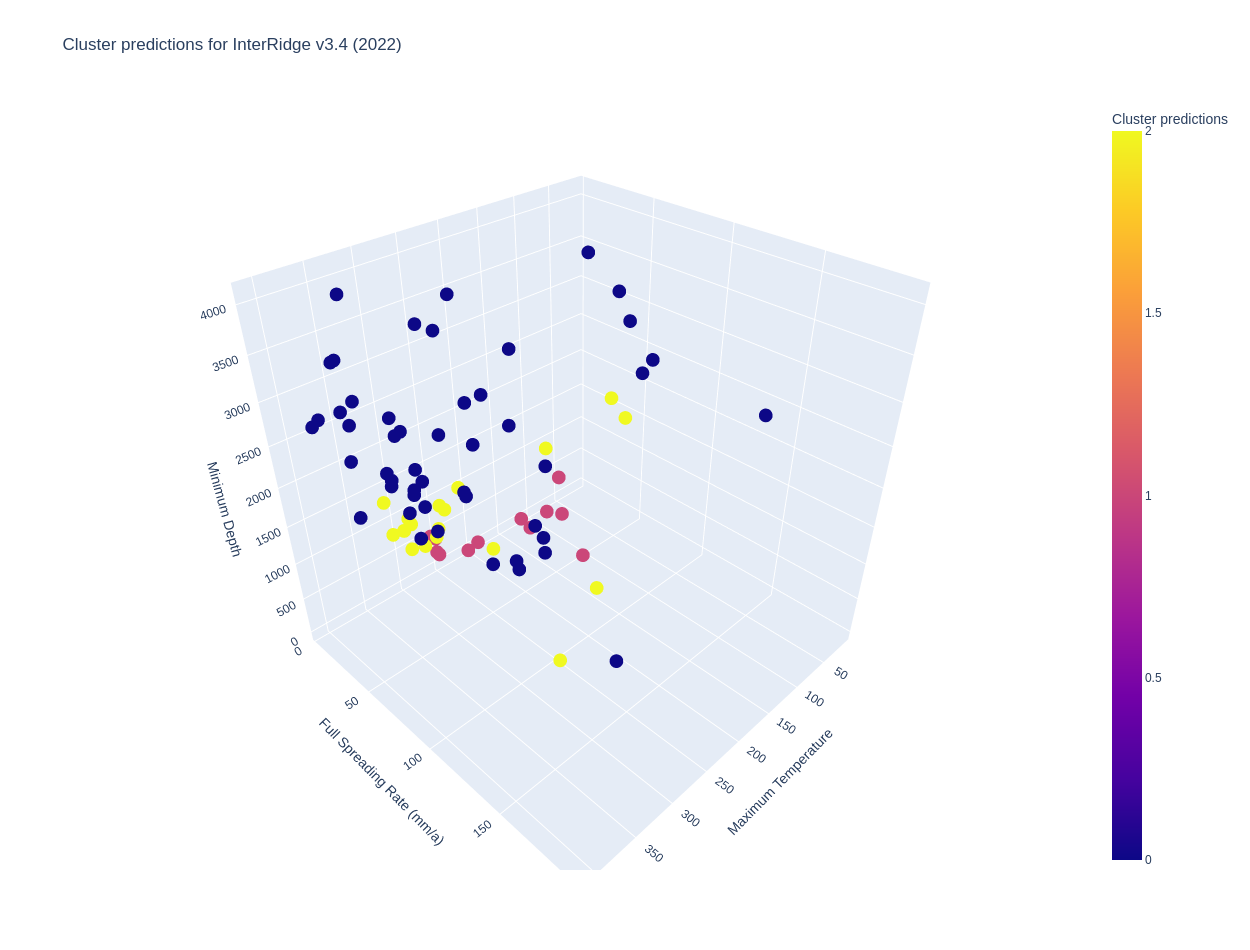

In [16]:
fig = px.scatter_3d(
    data_frame=final_data_df_complete,
    x="Maximum Temperature",
    y="Full Spreading Rate (mm/a)",
    z="Minimum Depth",
    hover_data=feature_cols + ["Cluster predictions"],
    color="Cluster predictions",
    title="Cluster predictions for InterRidge v3.4 (2022)"
)
fig.update_layout(
    autosize=False,
    height=950,
    width=1250
)
fig.show("png")

/home/willy/anaconda3/envs/xtrem/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:348: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/home/willy/anaconda3/envs/xtrem/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



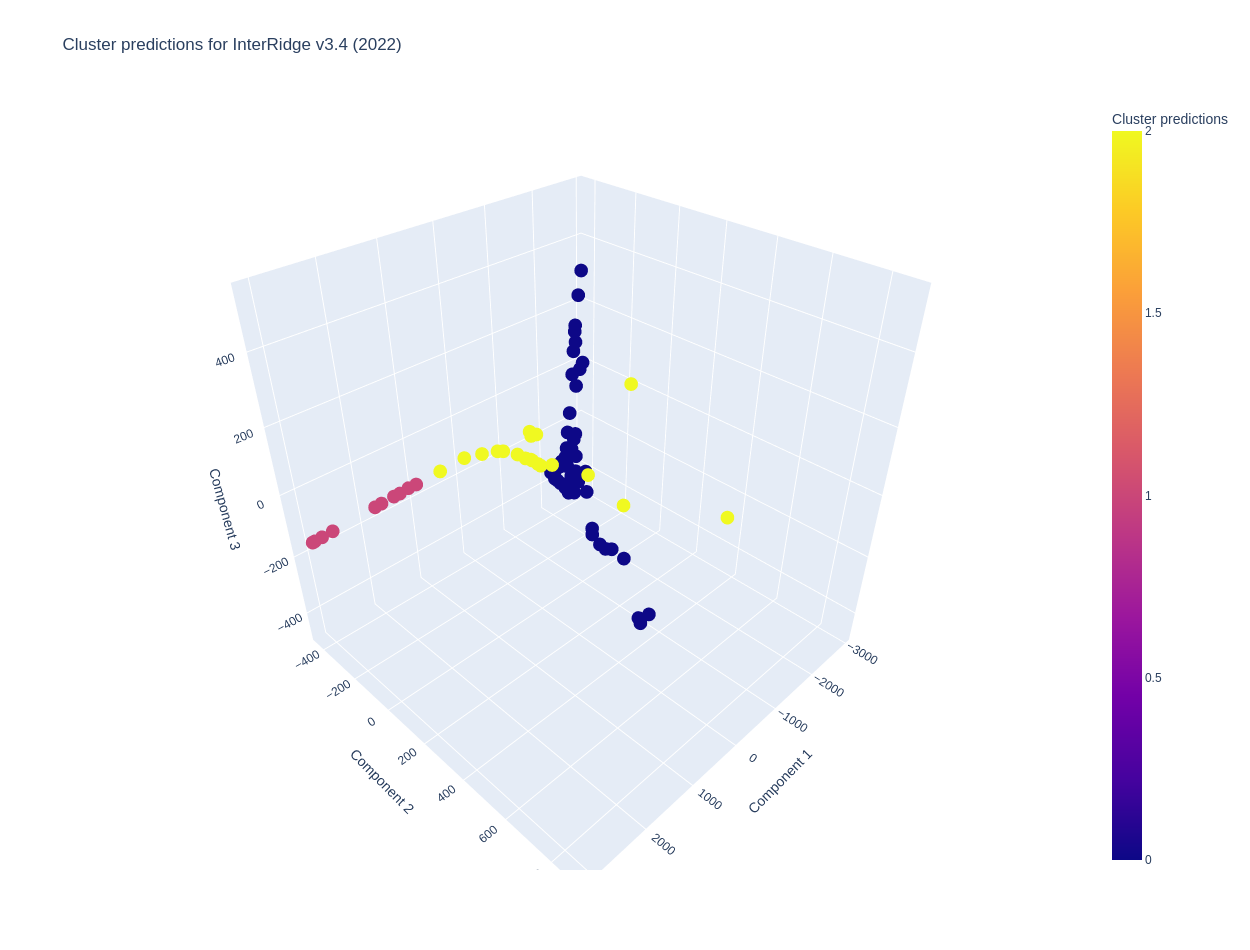

In [17]:
from sklearn.manifold import Isomap


embedding = Isomap(
    n_components=n_clusters,
    # random_state=RANDOM_STATE
).fit_transform(final_data_df_complete[feature_cols])

embedding = pd.DataFrame(
    embedding,
    columns=[f"Component {i + 1}" for i in range(n_clusters)]
)
embedding["Name ID"] = final_data_df_complete["Name ID"]

final_data_df_complete = pd.merge(
    left=final_data_df_complete,
    right=embedding,
    on="Name ID",
    how="inner"
)

fig = px.scatter_3d(
    data_frame=final_data_df_complete,
    x="Component 1",
    y="Component 2",
    z="Component 3",
    hover_data=feature_cols + ["Cluster predictions"],
    color="Cluster predictions",
    title="Cluster predictions for InterRidge v3.4 (2022)"
)
fig.update_layout(
    autosize=False,
    height=950,
    width=1250
)
fig.show("png")

#### Imputation of missing values

Again, strong assumptions when imputing missing data

In [18]:
## See: https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa

from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


estimator = RandomForestRegressor(
    n_estimators=15,
    max_depth=10,
    bootstrap=True,
    max_samples=0.5,
    n_jobs=2,
    random_state=RANDOM_STATE,
)
# estimator = KNeighborsRegressor(n_neighbors=15)

imputer = IterativeImputer(
    estimator=estimator,
    random_state=RANDOM_STATE
)

final_data_imputed = final_data_df.copy()

final_data_imputed[feature_cols] = imputer.fit_transform(
    final_data_df[feature_cols]
)

final_data_imputed


/home/willy/anaconda3/envs/xtrem/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



,Name ID,Maximum Temperature,Maximum or Single Reported Depth,Minimum Depth,Full Spreading Rate (mm/a),"Activity_active, confirmed","Activity_active, inferred",Activity_inactive,Tectonic setting_arc volcano,Tectonic setting_back-arc spreading center,...,Host Rock grouped_felsic-volcanic and volcanoclastic rocks,Host Rock grouped_rhyolite,Host Rock grouped_sediment-hosted,Host Rock grouped_ultramafic-hosted,Deposit Type grouped_DIS,Deposit Type grouped_LTH,Deposit Type grouped_NFS,Deposit Type grouped_PMS,Deposit Type grouped_PMS and NFS,Deposit Type grouped_VSD
0,13 N Ridge Site,33.000000,3036.0,2885.000000,50.500000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94SO2,224.600000,980.0,940.000000,50.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"AAR KR1, Mujin",265.886667,2100.0,2025.733333,65.100000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAR KR2,238.528788,3200.0,3038.333333,66.100000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ABE,309.000000,2220.0,2140.000000,73.100000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yokosuka,364.000000,2190.0,1726.400000,43.500000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717,Yoron Hole,247.000000,590.0,560.000000,30.100000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,Zealandia,72.463889,144.0,10.733333,18.171667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,Zenith-Victory,243.008658,2390.0,2370.000000,24.700000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.cluster import AgglomerativeClustering


n_clusters = 3

final_data_imputed["Cluster predictions"] = AgglomerativeClustering(
    n_clusters=n_clusters
).fit_predict(final_data_imputed[feature_cols])

As you can see in the plot below, depth seems to play a major role in the type of hydrothermal vent according to the clustering analysis, which may not be true in reality.

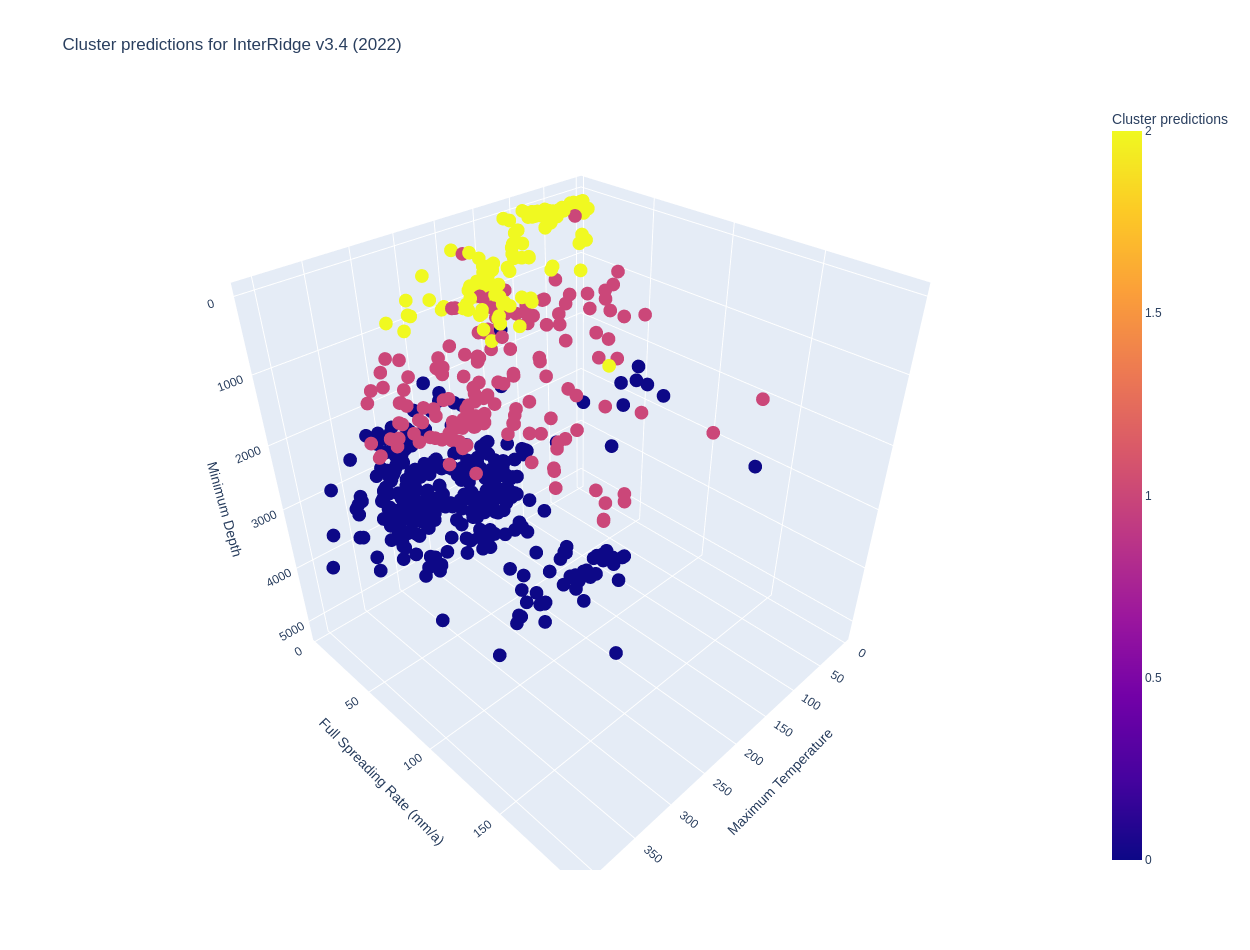

In [20]:
fig = px.scatter_3d(
    data_frame=final_data_imputed,
    x="Maximum Temperature",
    y="Full Spreading Rate (mm/a)",
    z="Minimum Depth",
    hover_data=feature_cols + ["Cluster predictions"],
    color="Cluster predictions",
    title="Cluster predictions for InterRidge v3.4 (2022)"
)
fig.update_layout(
    autosize=False,
    height=950,
    width=1250
)
# Show depth as natural to humans
fig.update_scenes(
    zaxis_autorange="reversed"
)
fig.show("png")

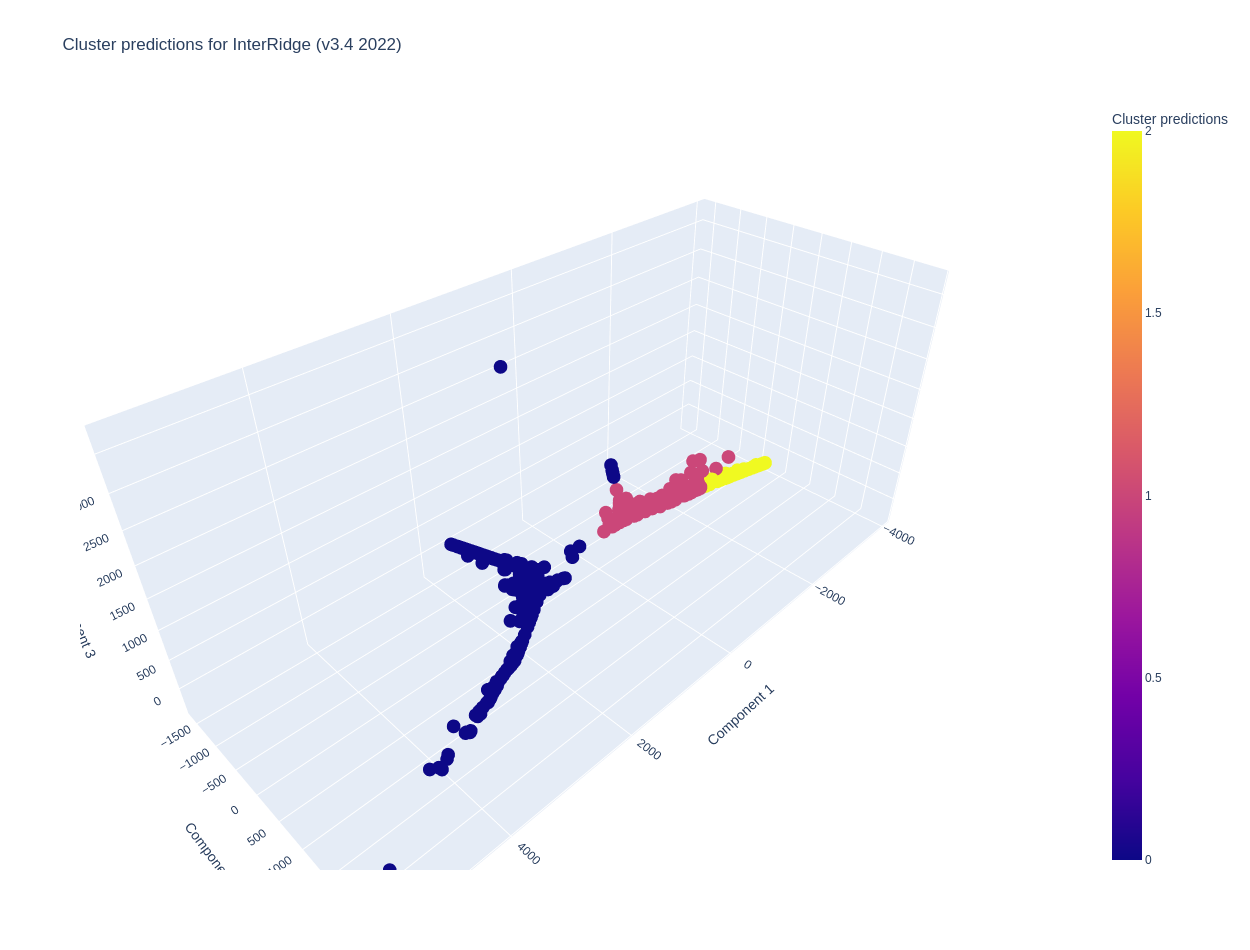

In [21]:
from sklearn.manifold import Isomap


embedding = Isomap(
    n_components=n_clusters,
    # random_state=RANDOM_STATE
).fit_transform(final_data_imputed[feature_cols])

embedding = pd.DataFrame(
    embedding,
    columns=[f"Component {i + 1}" for i in range(n_clusters)]
)
embedding["Name ID"] = final_data_imputed["Name ID"]

final_data_imputed = pd.merge(
    left=final_data_imputed,
    right=embedding,
    on="Name ID",
    how="inner"
)

fig = px.scatter_3d(
    data_frame=final_data_imputed,
    x="Component 1",
    y="Component 2",
    z="Component 3",
    hover_data=feature_cols + ["Cluster predictions"],
    color="Cluster predictions",
    title="Cluster predictions for InterRidge (v3.4 2022)"
)
fig.update_layout(
    autosize=False,
    height=950,
    width=1250
)
fig.show("png")

##### 3D visualizations

In [22]:
x_var = "Maximum Temperature"
y_var = "Full Spreading Rate (mm/a)"
z_var = "Minimum Depth"

In [23]:
# Get values for X and Y axis (drop NaN, sort, convert to string)
x_var_values = final_data_imputed[x_var].dropna().sort_values().astype(str).unique()
y_var_values = final_data_imputed[y_var].dropna().sort_values().astype(str).unique()

# Create placeholder surface matrix
surface_df = pd.DataFrame(
    index=x_var_values,
    columns=y_var_values
)

# Populate surface matrix
for _, row in final_data_imputed.iterrows():
    surface_df.loc[
        str(row[x_var]),
        str(row[y_var])
    ] = row[z_var]

The density of data is not enough for creating a surface, but we can interpolate between data points to try predict such surface.

In [24]:
# Linearly interpolate surface data
x, y = np.indices(surface_df.shape)
a = surface_df.values.astype(float)
surface_df_interp = a

surface_df_interp[np.isnan(surface_df_interp)] = griddata(
    points=(x[~np.isnan(a)], y[~np.isnan(a)]), # points we know
    values=a[~np.isnan(a)],                    # values we know
    xi=(x[np.isnan(a)], y[np.isnan(a)]),       # points to interpolate
    method="linear"
)

surface_df_interp = pd.DataFrame(
    surface_df_interp,
    index=surface_df.index,
    columns=surface_df.columns
)

# Round all values
surface_df_interp = surface_df_interp.round(2)
surface_df_interp.index = [str(round(float(item), 2)) for item in surface_df_interp.index]
surface_df_interp.columns = [str(round(float(item), 2)) for item in surface_df_interp.columns]

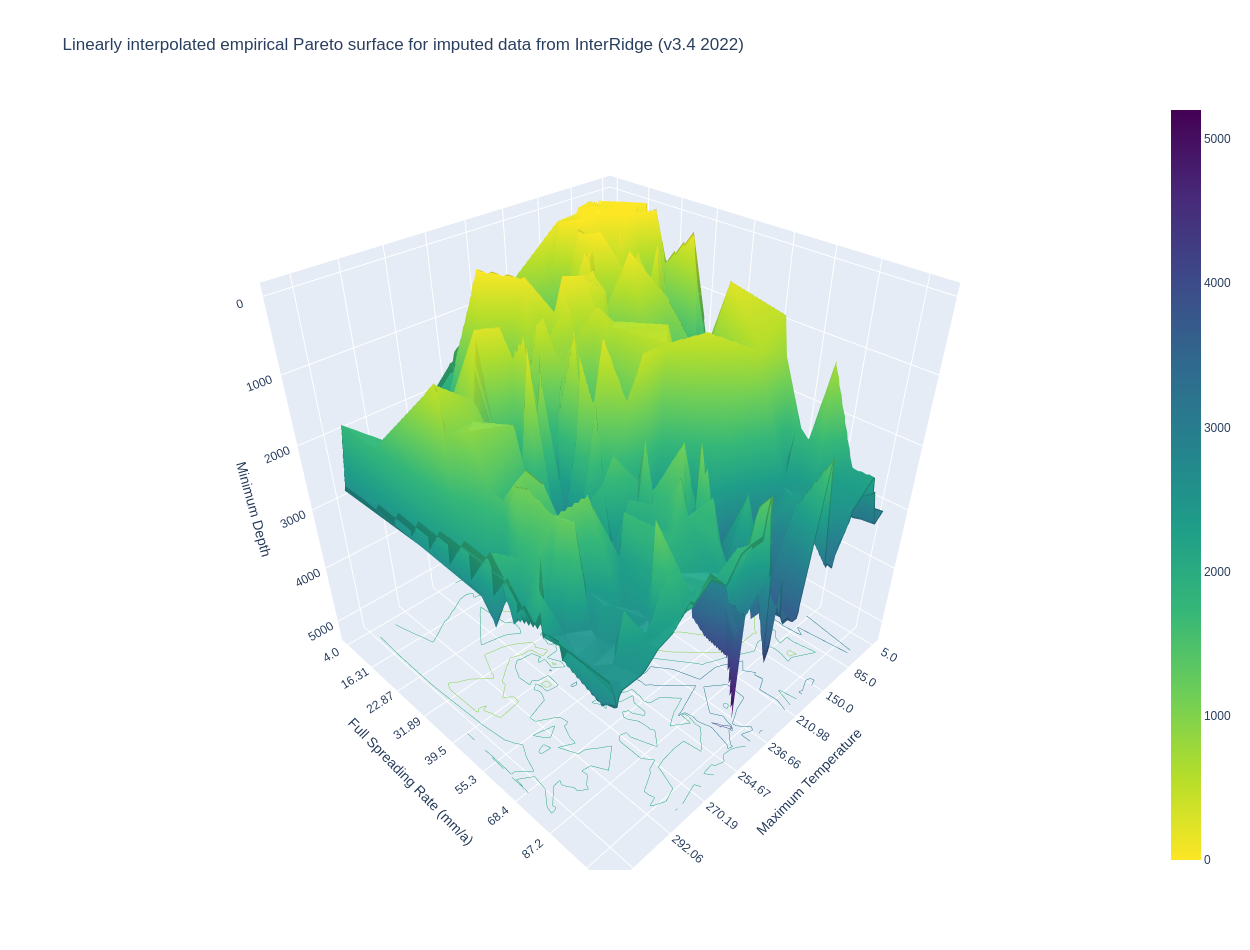

In [27]:
fig = go.Figure(
    data=[
        go.Surface(
            x=surface_df_interp.index,
            y=surface_df_interp.columns,
            z=surface_df_interp.values,
            colorscale="Viridis_r"
        )
    ]
)
fig.update_traces(
    contours_z=dict(
        show=True,
        usecolormap=True,
        highlightcolor="limegreen",
        project_z=True
    )
)
fig.update_layout(
    title="Linearly interpolated empirical Pareto surface for imputed data from InterRidge (v3.4 2022)",
    autosize=False,
    height=950,
    width=1250,
    # margin=dict(l=65, r=50, b=65, t=90)
    scene=dict(
        xaxis_title=x_var,
        yaxis_title=y_var,
        zaxis_title=z_var
    )
)
# Show depth as natural to humans
fig.update_scenes(
    zaxis_autorange="reversed"
)
fig.show("png")